In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

PATH = "C:/Users/antonin.duval/Documents/Python Scripts/IronCar/sample_dashed"


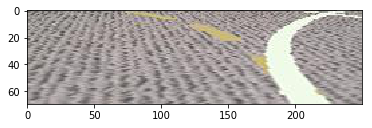

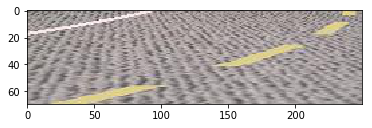

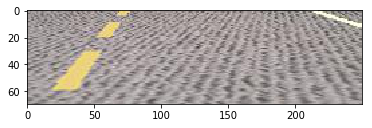

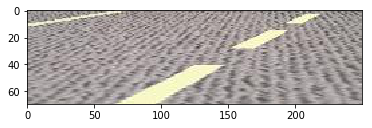

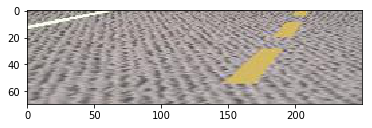

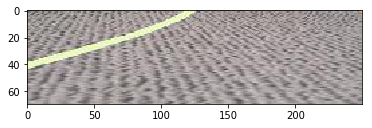

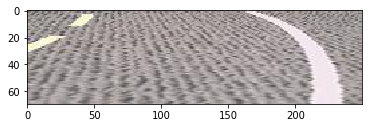

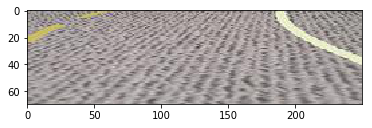

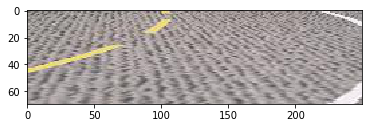

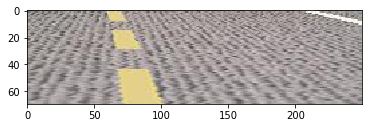

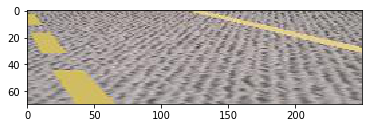

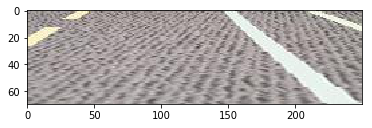

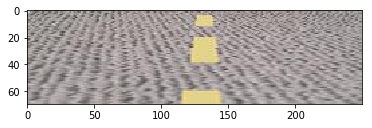

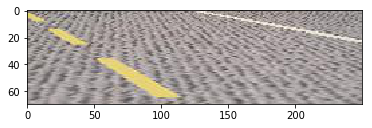

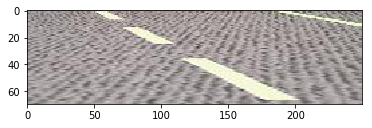

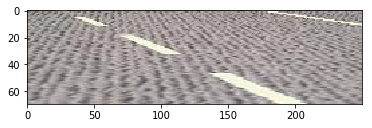

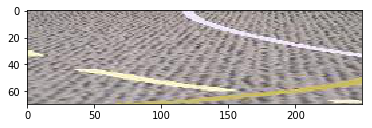

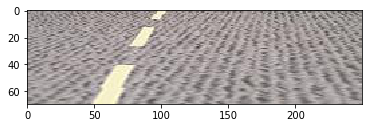

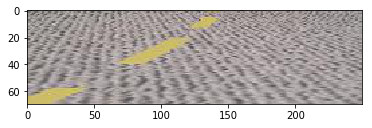

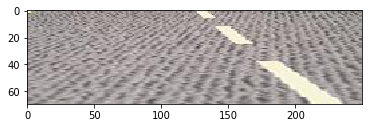

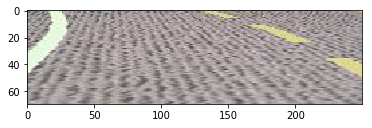

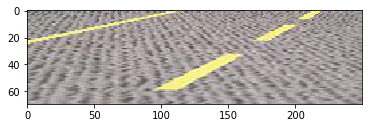

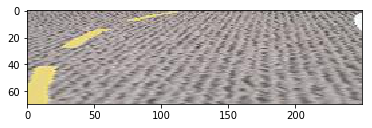

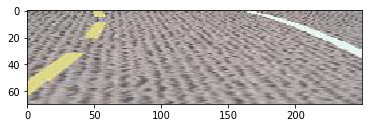

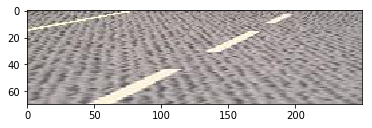

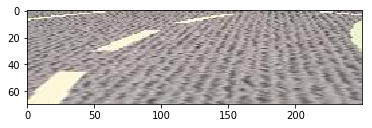

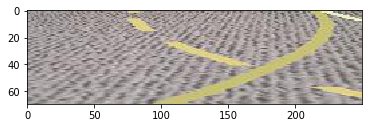

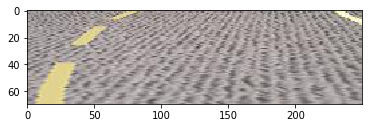

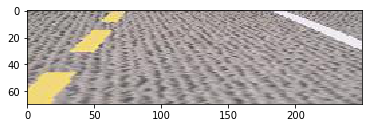

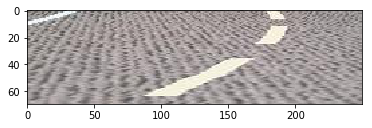

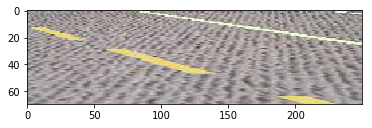

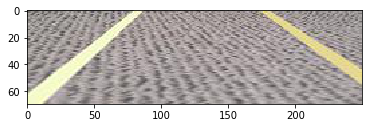

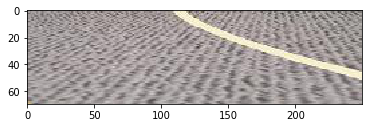

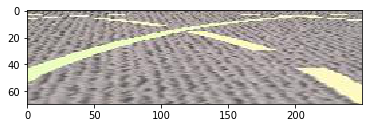

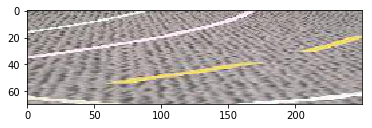

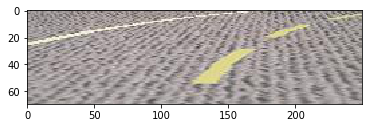

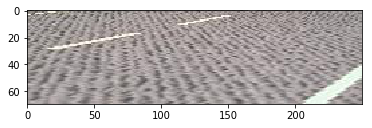

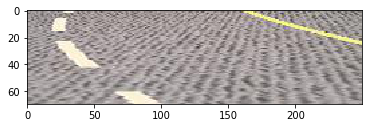

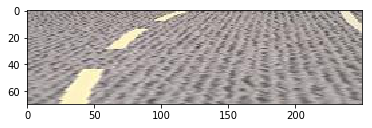

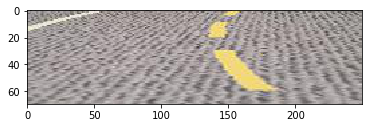

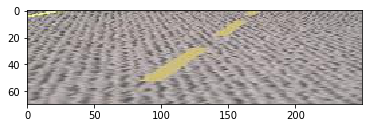

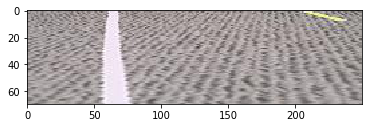

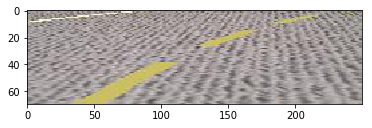

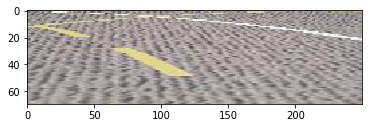

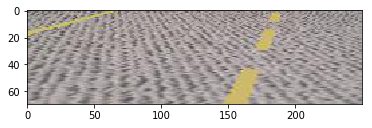

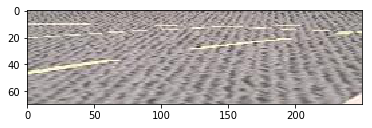

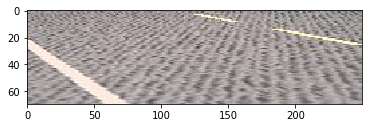

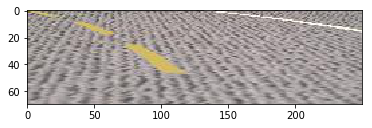

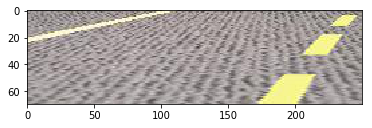

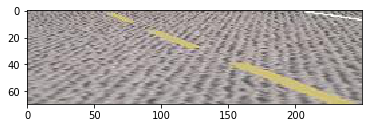

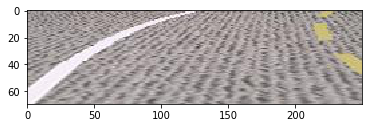

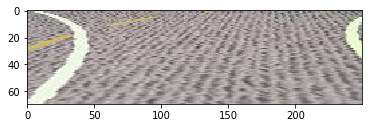

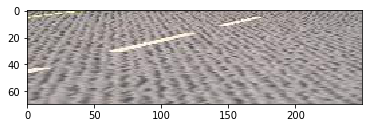

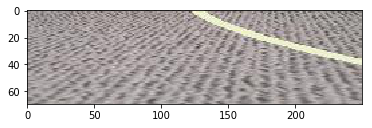

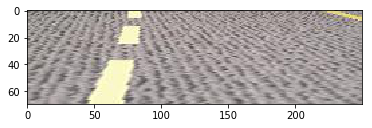

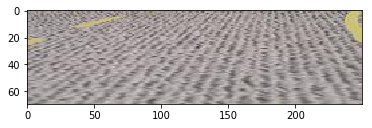

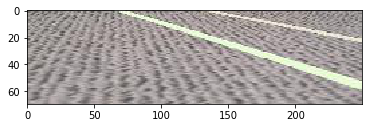

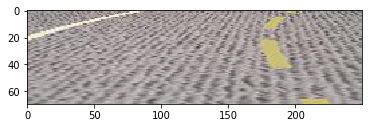

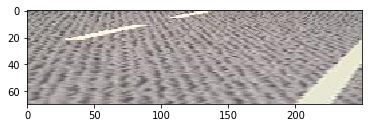

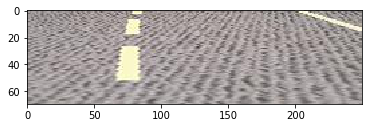

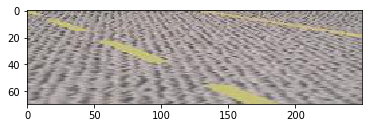

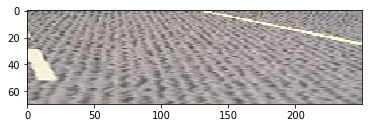

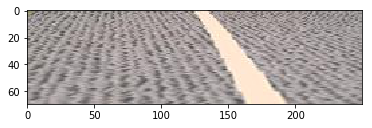

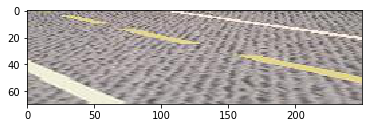

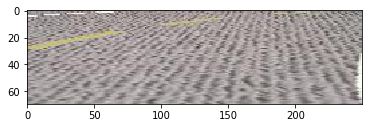

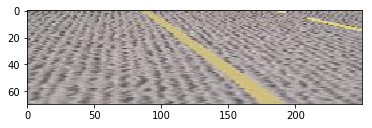

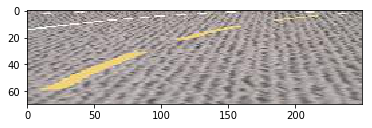

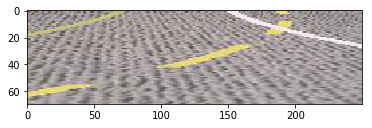

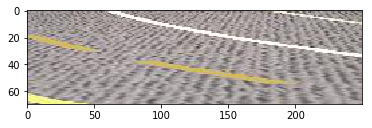

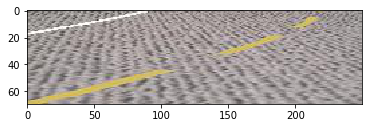

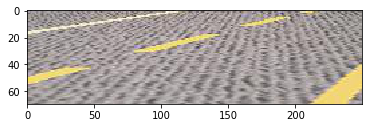

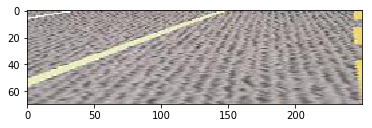

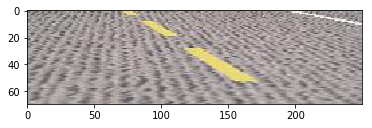

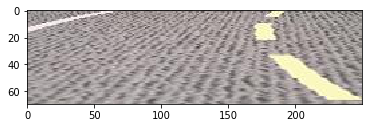

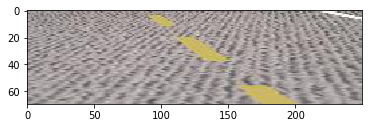

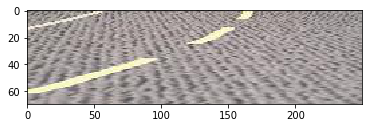

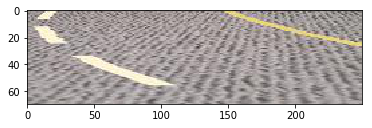

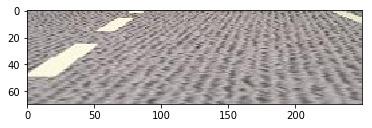

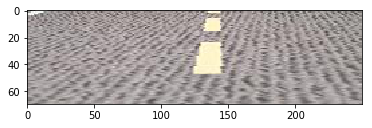

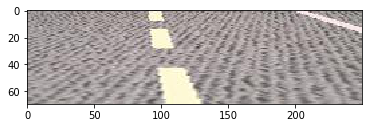

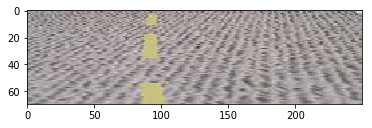

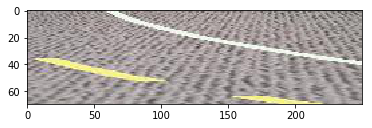

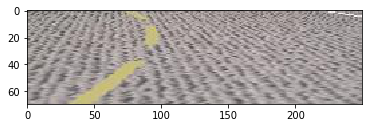

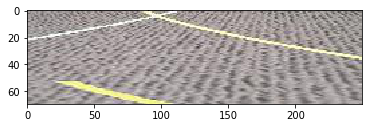

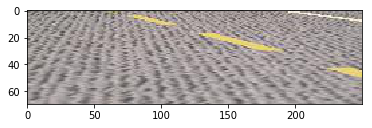

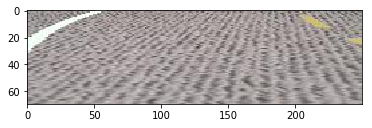

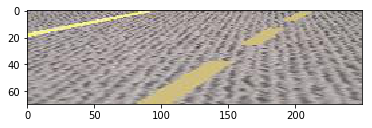

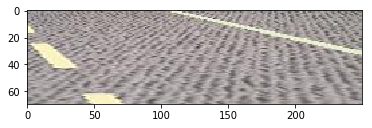

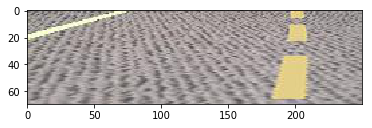

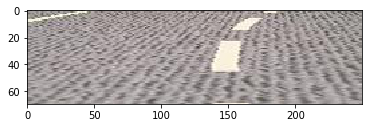

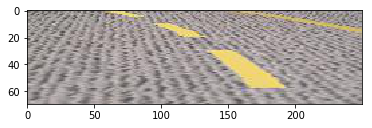

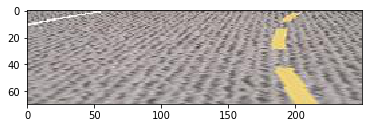

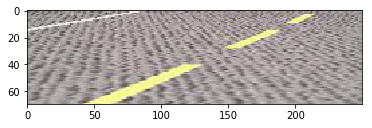

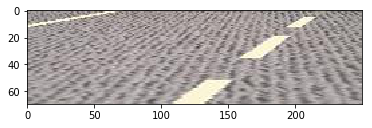

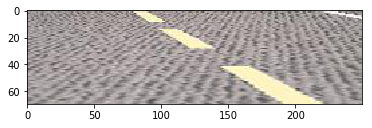

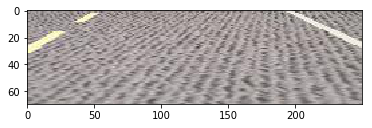

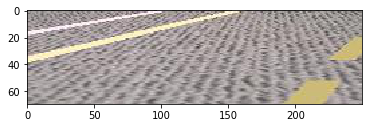

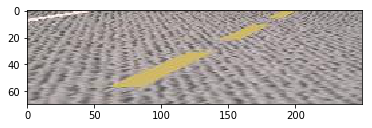

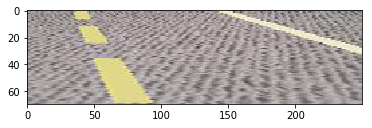

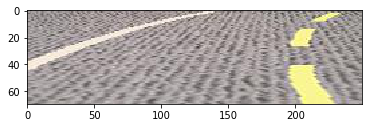

In [2]:
training_data = []

def create_training_data():
    for img in os.listdir(PATH):
        try:
            im = Image.open(os.path.join(PATH,img))
            training_data.append(im)
            plt.imshow(mpimg.imread(os.path.join(PATH,img)))
            plt.show()
        except Exception as e:
                pass

create_training_data()

In [3]:
w, h = training_data[0].size
px_def = set()
for i in range(w):
    for j in range(h):
        px_def.add((i, j))

i0, j0 = (w-1)//2, h-5
r_def = set()

def px_to_r(p):#distance du pixel
    i, j = p
    return i-i0, -j+j0

def r_to_px(p):#distance du point
    x, y = p
    return x+i0, -y+j0

for i in range(w):
    for j in range(h):
        p = i, j
        r_def.add(px_to_r(p))

In [4]:
def get_rline(p):
    x1, y1 = p
    rline = []
    for x, y in r_def:
        dl = x1*y - y1*x#down-left
        dr = x1*y - y1*(x+1)#down-right
        ur = x1*(y+1) - y1*(x+1)
        ul = x1*(y+1) - y1*x#up-left
        if not (dl > 0 and dr > 0 and ur > 0 and ul > 0) and not(dl < 0 and dr < 0 and ur < 0 and ul < 0):#traverse la ligne
            rline.append((x, y))
    rline = [p for p in rline if p[1]>=0]
    rline = sorted(rline, key=lambda p: p[0]**2 + p[1]**2)
    return rline

def get_pxline(x,y):
    rline = get_rline((x, y))
    pxline = [r_to_px(p) for p in rline]
    return pxline

def color_pxline(pxline,px):
    for i, j in pxline:
        px[i, j] = (255, 0, 0, 255)
    return px

In [5]:
vec1 = []
vec2 = []

x1 = -65
y1 = 15

x2 = 65
y2 = 15

for img in training_data:
    pxline1=get_pxline(x1,y1)
    pxline2=get_pxline(x2,y2)
    vec1.append(pxline1)
    vec2.append(pxline2)

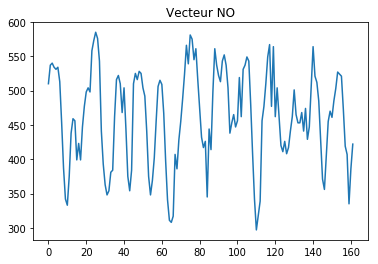

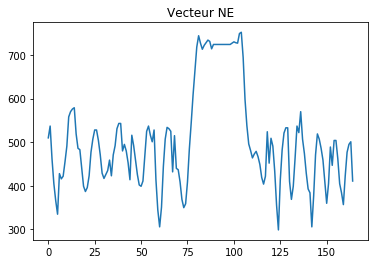

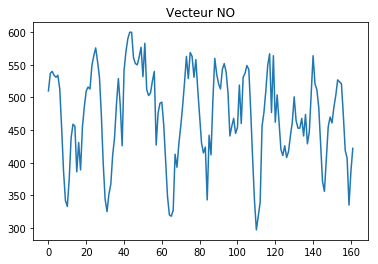

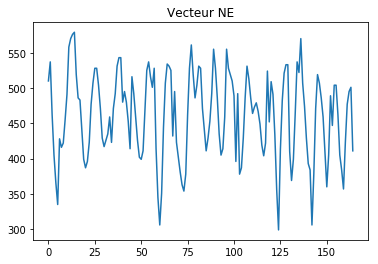

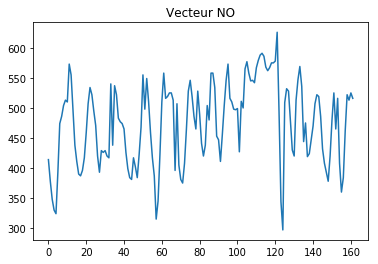

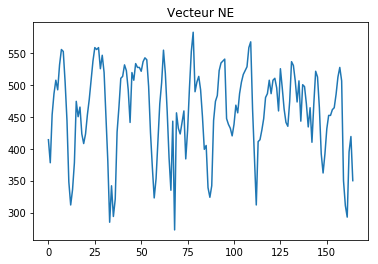

In [7]:
for i in range(0,3):   
    v = []
    v2 = []
    copy = training_data[i].copy()
    px=copy.load()
    pxline=vec1[i]
    pxline2=vec2[i]
    
    for i, j in pxline:
        v.append(px[i,j][0]+px[i,j][1]+px[i,j][2])
    for i, j in pxline2:    
        v2.append(px[i,j][0]+px[i,j][1]+px[i,j][2])
        
    px=color_pxline(pxline,px)
    px=color_pxline(pxline2,px)
    copy.show()
    plt.plot(v)
    plt.title('Vecteur NO')
    plt.show()
    plt.plot(v2)
    plt.title('Vecteur NE')
    plt.show()